In [18]:
import pandas as pd       # pandas, numpy : 데이터 생성 및 조작
import numpy as np
from sklearn.linear_model import LinearRegression    #sklearn : 추후 모델 학습 및 평가에 사용될 라이브리리
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split   #seaborn, matplotlib : 시각화를 위한 라이브리리
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
np.random.seed(42)   #랜덤 시드를 고정해서 결과 재현성을 확보, np.random.rand(100) : 0~1 사이의 무작위 숫자 100개를 생성

In [22]:
df = pd.DataFrame({                       # 다양한 분포와 타입의 feature를 생성
    'feature_1': np.random.rand(100),
    'feature_2': np.random.rand(100) * 2,
    'feature_3': np.random.randint(0, 2, 100),
    'feature_4': np.random.randn(100),
    'feature_5': np.random.rand(100) * 5,
})

#강한 상관관계를 가지는 피처 생성(feature_6는 feature_1에 거의 선형 비례 (노이즈 약간 추가))
df['feature_6'] = df['feature_1'] * 0.95 + np.random.rand(100) * 0.01

#feature들과의 관계(패턴) 를 가지도록 타깃값을 생성 (모델이 학습할 수 있는 구조를 만들어주는 중요한 과정)
df['target'] = df['feature_1'] * 3 + df['feature_3'] * 5 + np.random.randn(100) * 0.5

In [23]:
# 데이터셋 학습을 위해 trian_test 나누기
X= df.drop('target', axis=1)              # axis = 열을 삭제
y = df['target']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

In [25]:
## base 상태로 회귀모델 성능 

model_all=LinearRegression()                        # 1. 모델 선언
model_all.fit(X_train, y_train)                     # 2. 학습
y_pred_all =model_all.predict(X_test)               # 3. 예측
mse_all =mean_squared_error(y_test, y_pred_all)      # 4. 성능 평가 (MSE)
print(mse_all)                                      # 5. 결과 출력

0.28159642155895204


In [27]:
## 상관관계
## 변수 간 상관관계
## 타겟과의 상관관계
## 변수간의 상관관계를 살펴보자!
corr_matrix =X.corr().abs()    # abs - 음수든 절댓값 기준으로 관계의 강도

In [28]:
corr_matrix       #X의 각 feature들 간의 피어슨 상관계수(Pearson correlation coefficient)계산  값의 범위(-1 ~ 1)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6
feature_1,1.000000,0.034033,0.063631,0.164317,0.038737,0.999942
feature_2,0.034033,1.000000,0.136216,0.092174,0.016038,0.034262
feature_3,0.063631,0.136216,1.000000,0.097445,0.003064,0.063473
feature_4,0.164317,0.092174,0.097445,1.000000,0.041724,0.163392
feature_5,0.038737,0.016038,0.003064,0.041724,1.000000,0.039592
feature_6,0.999942,0.034262,0.063473,0.163392,0.039592,1.000000


In [29]:
# 2. 상관계수가 0.9 초과인 피처쌍 중에서 하나를 제거 대상에 추가
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        if corr_matrix.iloc[i, j] > 0.9:
            to_drop.add(col2)

# 3. 해당 피처 제거
X_filtered_1 = X.drop(columns=list(to_drop))

# 4. 다시 train/test 분리
X_train_1, X_test_1, _, _ = train_test_split(X_filtered_1, y, test_size=0.2, random_state=111)

In [30]:
model_corr = LinearRegression()                        # 1. 모델 선언
model_corr.fit(X_train_1, y_train)                     # 2. 전처리된 피처로 학습
y_pred_corr = model_corr.predict(X_test_1)             # 3. 예측
mse_corr = mean_squared_error(y_test, y_pred_corr)     # 4. 성능 평가
print(mse_corr)                                        # 5. MSE 출력

0.25743709291506517


In [32]:
corr_with_target=X.corrwith(y).abs()         #각 feature(X의 열)와 타깃(y) 사이의 피어슨 상관계수 계산
                                             #즉, feature_1 ~ feature_6 각각이 target과 선형적으로 얼마나 관련 있는지 알려줌

In [38]:
corr_with_target

feature_1    0.368519
feature_2    0.144010
feature_3    0.932366
feature_4    0.129946
feature_5    0.037407
feature_6    0.367881
dtype: float64

In [33]:
to_drop_low_target_corr =corr_with_target[corr_with_target < 0.1].index.tolist() #  상관계수(abs 기준)가 0.1보다 작은 feature만 필터링

In [34]:
X_filtered_2 = X.drop(columns = to_drop_low_target_corr)
X_train_2, X_test_2, _, _ = train_test_split(X_filtered_2, y, test_size=0.2, random_state=111)

In [35]:
model_target = LinearRegression()
model_target.fit(X_train_2, y_train)
y_pred_target = model_target.predict(X_test_2)
mse_target = mean_squared_error(y_test, y_pred_target)
print(mse_target)

0.2477495854305865


In [36]:
print(X['feature_1'].corr(y))
print(X['feature_6'].corr(y))

0.3685191526184477
0.36788103333418515


# feature 6이 아니라 feature 1을 지운 경우에 성능평가 비교

In [41]:
# feature_1만 제거 (feature_6은 유지)
X_removed_f1 = X.drop(columns=['feature_1'])

# 다시 학습/테스트 셋 분리
X_train_f1, X_test_f1, _, _ = train_test_split(X_removed_f1, y, test_size=0.2, random_state=111)

In [40]:
model_f1 = LinearRegression()
model_f1.fit(X_train_f1, y_train)

y_pred_f1 = model_f1.predict(X_test_f1)
mse_f1 = mean_squared_error(y_test, y_pred_f1)

print("MSE (feature_1 제거):", mse_f1)

MSE (feature_1 제거): 0.2577425402292611


mse_corr < mse_f1           feature_1 이 실제로 더 중요한 정보

# feature 6과, feature 1을 지웠을 때 둘 비교하기

In [43]:
# feature_6 제거
X_drop_f6 = X.drop(columns=['feature_6'])

# train/test split
X_train_f6, X_test_f6, _, _ = train_test_split(X_drop_f6, y, test_size=0.2, random_state=111)

model_f6 = LinearRegression()
model_f6.fit(X_train_f6, y_train)
y_pred_f6 = model_f6.predict(X_test_f6)

# 성능 평가 (MSE)
mse_f6 = mean_squared_error(y_test, y_pred_f6)
print("MSE (feature_6 제거):", mse_f6)

MSE (feature_6 제거): 0.25743709291506517


In [44]:
# feature_1 제거
X_drop_f1 = X.drop(columns=['feature_1'])

# train/test split
X_train_f1, X_test_f1, _, _ = train_test_split(X_drop_f1, y, test_size=0.2, random_state=111)

# 회귀 모델 학습 & 예측
model_f1 = LinearRegression()
model_f1.fit(X_train_f1, y_train)
y_pred_f1 = model_f1.predict(X_test_f1)

mse_f1 = mean_squared_error(y_test, y_pred_f1)
print("MSE (feature_1 제거):", mse_f1)


MSE (feature_1 제거): 0.2577425402292611


In [45]:
print(f"MSE (feature_6 제거): {mse_f6:.4f}")
print(f"MSE (feature_1 제거): {mse_f1:.4f}")

MSE (feature_6 제거): 0.2574
MSE (feature_1 제거): 0.2577


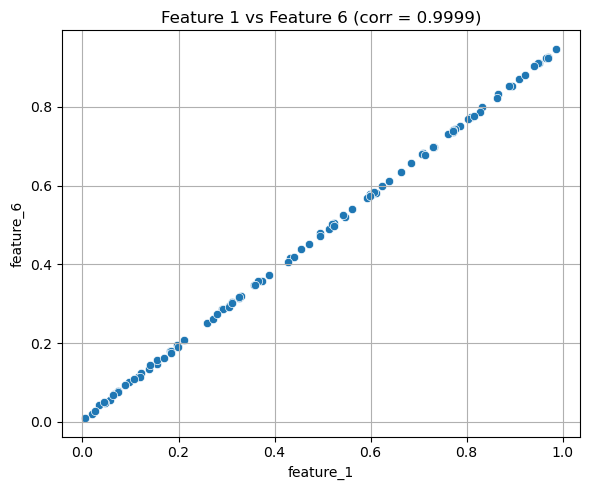

In [46]:
# 산점도 그리기
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='feature_1', y='feature_6')

# 상관계수 출력
corr_val = df[['feature_1', 'feature_6']].corr().iloc[0, 1]
plt.title(f'Feature 1 vs Feature 6 (corr = {corr_val:.4f})')
plt.xlabel('feature_1')
plt.ylabel('feature_6')
plt.grid(True)
plt.tight_layout()
plt.show()

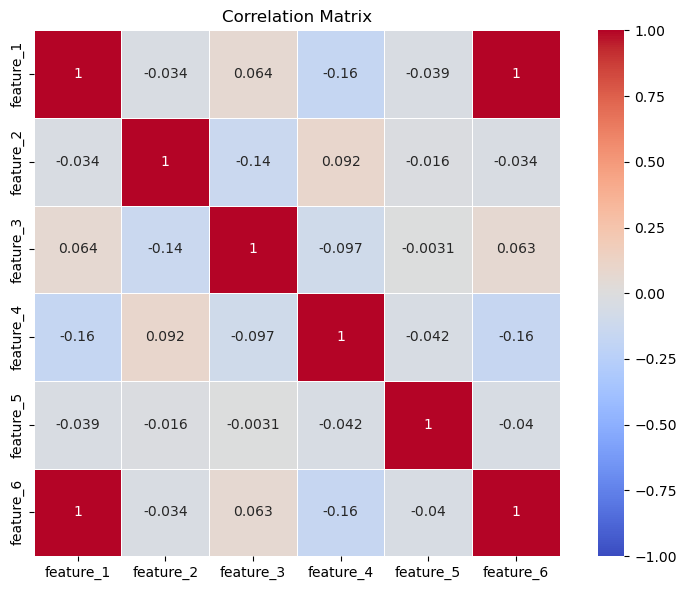

In [48]:
# feature_1 ~ feature_6 상관관계 계산
feature_cols = [f'feature_{i}' for i in range(1, 7)]
corr_matrix = df[feature_cols].corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# VIF( Variance Inflaction Factor)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
## VIF 계수 함수
def calculate_vif(X):
    vif_df = pd.DataFrame()
    vif_df['feature'] = X.columns
    vif_df['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vif_df
# 반복

def drop_high_vif_features(X, thresh = 10.0):
    X_curr =X.copy()
    while True:
        vif_df=calculate_vif(X_curr)
        max_vif=vif_df['VIF'].max()
        if max_vif < thresh:
            break
        drop_feature =vif_df.sort_values('VIF',ascending=False).iloc[0]['feature']
        print(f"Drop'{drop_feature}', VIF={max_vif:.2f})")
        X_curr = X_curr.drop(columns=[drop_feature])
    return X_curr


X_vif=drop_high_vif_features(X, thresh=10.0)

Drop'feature_6', VIF=23418.45)


In [ ]:
vif_final = calculate_vif(X_vif)   # 남은 feature들의 VIF계산
print(vif_final)                   

In [58]:
X_train_vif, X_test_vif, _, _ = train_test_split(X_vif, y, test_size=0.2, random_state=111)

model_vif = LinearRegression()
model_vif.fit(X_train_vif, y_train)
y_pred_vif = model_vif.predict(X_test_vif)
mse_vif = mean_squared_error(y_test, y_pred_vif)

print("MSE (VIF 기반 제거 후):", mse_vif)

MSE (VIF 기반 제거 후): 0.25743709291506517


# 캘리포니아 집값 데이터셋
- 회귀분석을 진행하기 위해서 피처에 대한 selection

In [45]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# 데이터 불러오기
california = fetch_california_housing()

# 특성과 타겟 확인
X = pd.DataFrame(california.data, columns=california.feature_names)  #입력값을 DataFrame 형태로 변환
y = pd.Series(california.target, name='MedHouseValue')               #타깃값 (각 지역의 중위수 주택 가격)을 Series로 변환

# 데이터 확인
print(X.head())
print(y.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseValue, dtype: float64


In [47]:
df = pd.DataFrame(california.data, columns=california.feature_names)
# 데이터 개수 확인
print(f"행 개수: {df.shape[0]}, 열 개수: {df.shape[1]}")

행 개수: 20640, 열 개수: 8


In [5]:
corr_with_target = X.corrwith(y).abs()
to_drop_low_corr = corr_with_target[corr_with_target < 0.1].index.tolist()
X_filtered_corr = X.drop(columns=to_drop_low_corr)

In [6]:
X_filtered_corr

,MedInc,HouseAge,AveRooms,Latitude
0,8.3252,41.0,6.984127,37.88
1,8.3014,21.0,6.238137,37.86
2,7.2574,52.0,8.288136,37.85
3,5.6431,52.0,5.817352,37.85
4,3.8462,52.0,6.281853,37.85
...,...,...,...,...
20635,1.5603,25.0,5.045455,39.48
20636,2.5568,18.0,6.114035,39.49
20637,1.7000,17.0,5.205543,39.43
20638,1.8672,18.0,5.329513,39.43


In [7]:
# 상관계수 절댓값 계산
corr_with_target = X.corrwith(y).abs()

# 상관계수 기준 설정 (예: 0.1)
corr_threshold = 0.1
selected_by_corr = corr_with_target[corr_with_target > corr_threshold].index.tolist()

# 상관관계 기반 필터링
X_corr_filtered = X[selected_by_corr]

In [8]:
X_corr_filtered

,MedInc,HouseAge,AveRooms,Latitude
0,8.3252,41.0,6.984127,37.88
1,8.3014,21.0,6.238137,37.86
2,7.2574,52.0,8.288136,37.85
3,5.6431,52.0,5.817352,37.85
4,3.8462,52.0,6.281853,37.85
...,...,...,...,...
20635,1.5603,25.0,5.045455,39.48
20636,2.5568,18.0,6.114035,39.49
20637,1.7000,17.0,5.205543,39.43
20638,1.8672,18.0,5.329513,39.43


In [10]:
corr_with_target_filtered = X_corr_filtered.corrwith(y)

In [11]:
corr_with_target_filtered

MedInc      0.688075
HouseAge    0.105623
AveRooms    0.151948
Latitude   -0.144160
dtype: float64

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    return pd.DataFrame({
        'feature': X.columns,
        'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    })

def drop_high_vif_features(X, thresh=10.0):
    X_curr = X.copy()
    while True:
        vif_df = calculate_vif(X_curr)
        max_vif = vif_df['VIF'].max()
        if max_vif < thresh:
            break
        drop_feature = vif_df.sort_values('VIF', ascending=False).iloc[0]['feature']
        print(f" Drop '{drop_feature}' (VIF={max_vif:.2f})")
        X_curr = X_curr.drop(columns=[drop_feature])
    return X_curr

In [13]:
X_final = drop_high_vif_features(X_corr_filtered, thresh=10.0)

 Drop 'Latitude' (VIF=14.81)


In [14]:
print("최종 피처 목록:", X_final.columns.tolist())

최종 피처 목록: ['MedInc', 'HouseAge', 'AveRooms']


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")

MSE: 0.6589


In [19]:
X['MedInc_log'] = np.log1p(X['MedInc'])
X['AveRooms_log'] = np.log1p(X['AveRooms'])
X['HouseAge_log'] = np.log1p(X['HouseAge'])          #log1p는 log(1 + x)로, 0 값 처리

In [20]:
import numpy as np

# 복사본 생성
X_log = X_final.copy()

# 로그 변환 적용 (예: 왜도가 높을 수 있는 피처들)
X_log['MedInc_log'] = np.log1p(X_log['MedInc'])
X_log['AveRooms_log'] = np.log1p(X_log['AveRooms'])
X_log['HouseAge_log'] = np.log1p(X_log['HouseAge'])

# 원래 피처 제거 (선택사항: 중복 제거 위해)
X_log.drop(columns=['MedInc', 'AveRooms', 'HouseAge'], inplace=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size=0.2, random_state=111)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"로그 변환 후 MSE: {mse:.4f}")

로그 변환 후 MSE: 0.6917


In [23]:
log_features = ['MedInc_log', 'AveRooms_log', 'HouseAge_log']
corr_with_target_log = X_log[log_features].corrwith(y)

In [24]:
corr_with_target_log 

MedInc_log      0.669914
AveRooms_log    0.241034
HouseAge_log    0.079158
dtype: float64

In [25]:
# 복사본 생성
X_log2 = X_final.copy()

# 로그 변환 적용 (AveRooms만)
X_log2['AveRooms_log'] = np.log1p(X_log2['AveRooms'])

# 원래 피처 제거 (중복 방지)
X_log2.drop(columns=['AveRooms'], inplace=True)

In [26]:
# 필요한 원본 피처들 복원
X_log2['AveOccup'] = X['AveOccup']
X_log2['AveBedrms'] = X['AveBedrms']
X_log2['Population'] = X['Population']

# 파생 변수 생성
X_log2['Rooms_per_Household'] = X_log2['AveRooms_log'] / X_log2['AveOccup']
X_log2['Bedrooms_Ratio'] = X_log2['AveBedrms'] / X_log2['AveRooms_log']
X_log2['People_per_Household'] = X_log2['Population'] / X_log2['AveOccup']

#파생 변수와 타깃 간 상관계수 계산
derived_features = ['Rooms_per_Household', 'Bedrooms_Ratio', 'People_per_Household']
corr_with_target_derived = X_log2[derived_features].corrwith(y)

In [27]:
print(X_log2.columns)

Index(['MedInc', 'HouseAge', 'AveRooms_log', 'AveOccup', 'AveBedrms',
       'Population', 'Rooms_per_Household', 'Bedrooms_Ratio',
       'People_per_Household'],
      dtype='object')


In [28]:
corr_with_target_derived

Rooms_per_Household     0.338541
Bedrooms_Ratio         -0.194159
People_per_Household    0.065843
dtype: float64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_log2, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f" 파생 변수 포함 모델 MSE: {mse:.4f}")

 파생 변수 포함 모델 MSE: 0.5316
